In [1]:
import pandas as pd
import numpy as np
#import geopandas as geopd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel('../main_data/sac_3yr_aggregate/3 year 21-22-23 SAC Agg.xlsx')
df.head()

,State,Year,Organizations,Intake - Relinquished By Owner Total-Feline,Intake - Stray At Large Total-Feline,Intake - Transferred In Total-Feline,Intake - Owner Intended Euthanasia Total-Feline,Intakes - Other Intakes Total-Feline,Live Outcome - Adoption Total-Feline,Live Outcome - Returned To Owner Total-Feline,...,Intakes - Other Intakes Total-Canine,Live Outcome - Adoption Total-Canine,Live Outcome - Returned To Owner Total-Canine,Live Outcome - Returned To Field Total-Canine,Live Outcome - Transferred Out Total-Canine,Live outcome - Other Live Outcome Total-Canine,Other Outcome - Died In Care Total-Canine,Other Outcome - Lost In Care Total-Canine,Other Outcome - Owner Intended Euthanasia Total-Canine,Other Outcome - Shelter Euthanasia Total-Canine
0,AK,2021,5,886,1620,85,37,133,2217,365,...,144,763,948,0,3,6,7,0,80,82
1,AK,2022,5,1128,1878,51,42,146,2158,310,...,189,1106,1006,0,1,3,4,1,112,216
2,AK,2023,5,911,1814,45,42,122,2148,223,...,210,993,880,0,8,4,12,1,149,257
3,AL,2021,17,1548,3414,707,0,644,3816,78,...,1953,6577,2101,1,3592,90,180,7,7,2994
4,AL,2022,17,1419,3400,816,3,503,4307,65,...,2277,6681,2012,0,3190,808,193,14,0,3262


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   State                                                   153 non-null    object
 1   Year                                                    153 non-null    int64 
 2   Organizations                                           153 non-null    int64 
 3   Intake - Relinquished By Owner Total-Feline             153 non-null    int64 
 4   Intake - Stray At Large Total-Feline                    153 non-null    int64 
 5   Intake - Transferred In Total-Feline                    153 non-null    int64 
 6   Intake - Owner Intended Euthanasia Total-Feline         153 non-null    int64 
 7   Intakes - Other Intakes Total-Feline                    153 non-null    int64 
 8   Live Outcome - Adoption Total-Feline              

In [4]:
dog_df = df.drop([i for i in df.columns if 'Feline' in i], axis=1)

list01 = [i for i in dog_df.columns.unique() if 'Feline' not in i]
list02 = [i.replace(' - ','_').replace('-','_').replace(' ','_').lower() for i in list01]
edit_col = {list01[i]:list02[i] for i in range(len(list01))}
del list01, list02

dog_df.rename(columns=edit_col, inplace=True)


In [5]:
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   state                                                 153 non-null    object
 1   year                                                  153 non-null    int64 
 2   organizations                                         153 non-null    int64 
 3   intake_relinquished_by_owner_total_canine             153 non-null    int64 
 4   intake_stray_at_large_total_canine                    153 non-null    int64 
 5   intake_transferred_in_total_canine                    153 non-null    int64 
 6   intake_owner_intended_euthanasia_total_canine         153 non-null    int64 
 7   intakes_other_intakes_total_canine                    153 non-null    int64 
 8   live_outcome_adoption_total_canine                    153 non-null    

In [6]:
intake_cols = [i for i in dog_df.columns if 'intake' in i]
outome_cols = [i for i in dog_df.columns if 'outcome' in i]
dog_df['intake_total']  = dog_df[intake_cols].sum(axis=1)
dog_df['outcome_total'] = dog_df[outome_cols].sum(axis=1)
#del intake_cols, outome_cols


In [7]:
dog_df['diff'] = dog_df.outcome_total - dog_df.intake_total

In [8]:
dog_df[['state','year','intake_total','outcome_total','diff']]


,state,year,intake_total,outcome_total,diff
0,AK,2021,1914,1889,-25
1,AK,2022,2438,2449,11
2,AK,2023,2278,2304,26
3,AL,2021,15304,15549,245
4,AL,2022,15959,16160,201
...,...,...,...,...,...
148,WV,2022,5128,5149,21
149,WV,2023,4920,5072,152
150,WY,2021,4017,4449,432
151,WY,2022,3904,4162,258


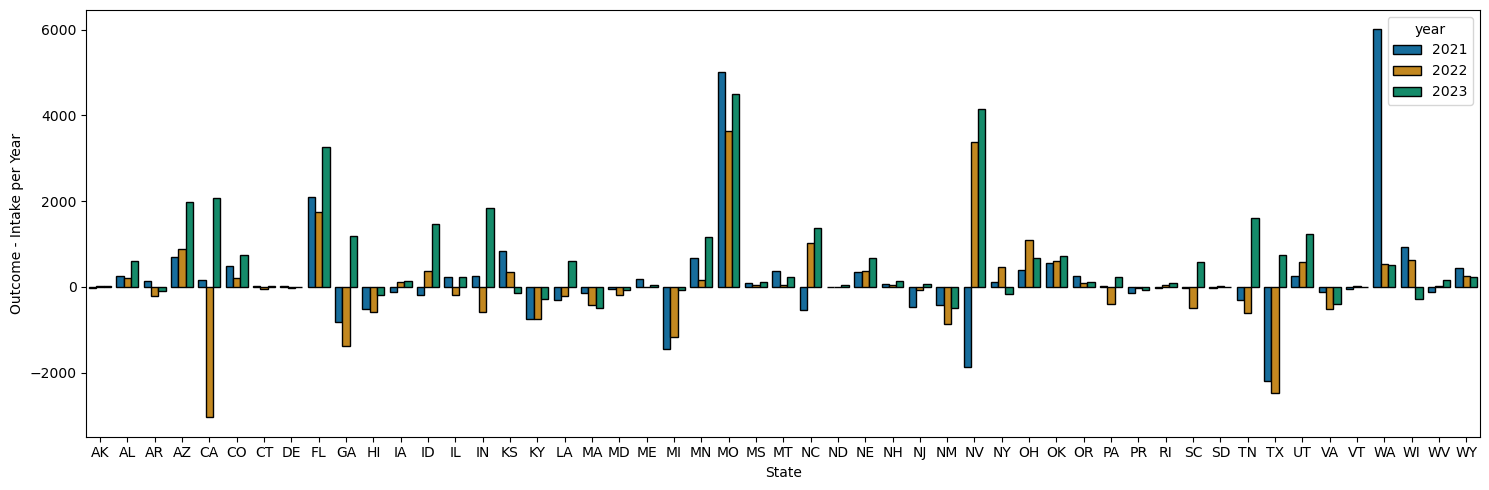

<Figure size 640x480 with 0 Axes>

In [9]:
fig = plt.figure(figsize=(15,5))
sns.barplot(data=dog_df,
            x='state',
            y='diff',
            hue='year',
            palette='colorblind', edgecolor='black')
plt.ylabel("Outcome - Intake per Year")
plt.xlabel("State")
plt.tight_layout()
#plt.savefig("eda_3yr-sas-agg_diff01.png", dpi=300)
plt.show()
plt.clf()
